In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set_style(style="darkgrid")

In [2]:
diamond = pd.read_csv('../data/diamond.csv').drop('Unnamed: 0', axis=1)

In [3]:
y = diamond['price']
x = diamond['carat']
n = len(y)

In [4]:
model = smf.ols('price ~ carat', data=diamond).fit()
e = model.resid
yhat = model.predict()

In [5]:
max(abs(e - (y - yhat)))

0.0

In [6]:
max(abs(e - (y - model.params[0] - model.params[1] * x)))

0.0

In [7]:
sum(e)

2.2168933355715126e-12

In [8]:
sum(e * x)

5.737632591262809e-13

Text(0, 0.5, 'Price(SIN $)')

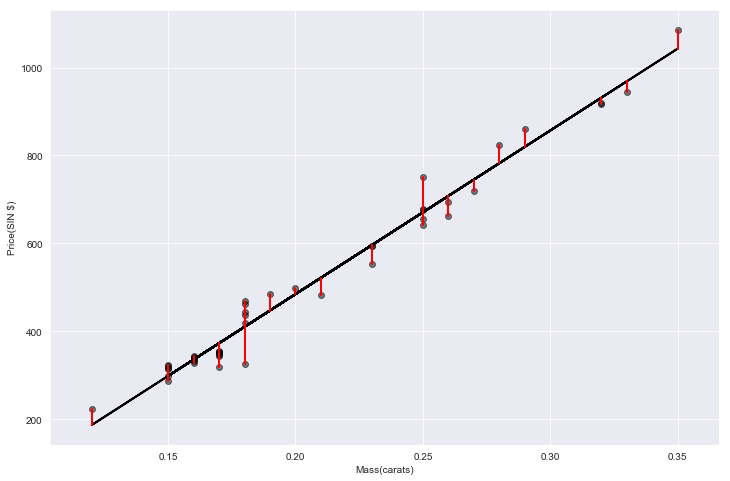

In [9]:
'''
    draw the scatter plot
    the for loop is for draw the lines connecting the real value and the predicted value
'''
ax, figsize = plt.subplots(figsize=(12, 8))
plt.scatter(x, y, alpha=0.5, color='black')
plt.plot(x, yhat, linewidth=2, color='black')

for i in range(len(x)):
    plt.plot(
        [x[i], x[i]], 
        [y[i], model.predict({'carat': x[i]})],
        linewidth=2, 
        color='r'
    )
plt.xlabel('Mass(carats)')
plt.ylabel('Price(SIN $)')

## Plot the Residuals

Text(0, 0.5, 'Residuals(SIN $)')

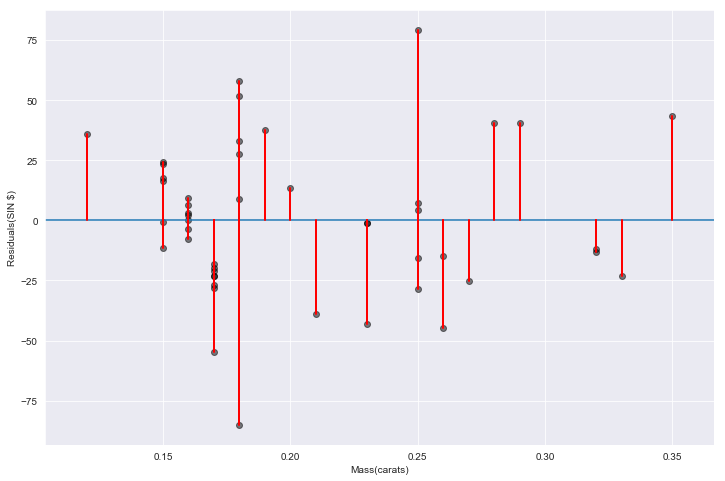

In [10]:
ax, figsize = plt.subplots(figsize=(12, 8))
plt.scatter(x, e, alpha=0.5, color='black')
plt.axhline(y=0)
for i in range(len(x)) :
    plt.plot(
        [x[i], x[i]], 
        [0, e[i]],
        linewidth=2, 
        color='r')
plt.xlabel('Mass(carats)')
plt.ylabel('Residuals(SIN $)')

## Non-Linear Data

In [11]:
x = np.random.uniform(-3, 3, 100)
y = x + np.sin(x) + np.random.normal(scale=0.2, size=100)

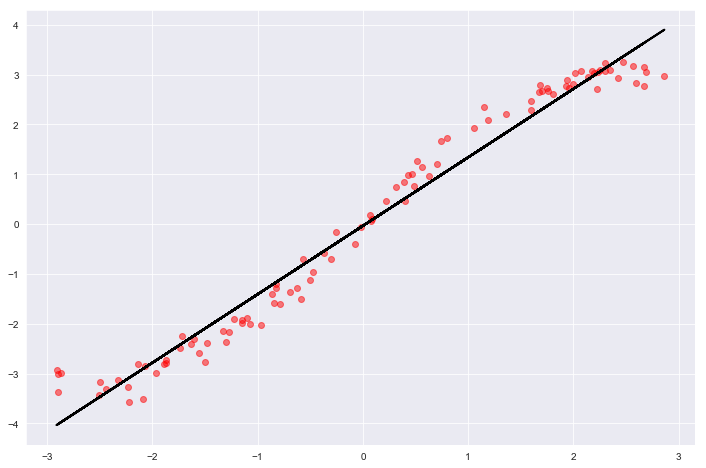

In [12]:
model = sm.OLS(y, sm.add_constant(x)).fit()
e = model.resid
yhat = model.predict()

ax, figsize = plt.subplots(figsize=(12, 8))
plt.scatter(x, y, alpha=0.5, color = 'red')
plt.plot(x, yhat, linewidth=2, color = 'black')

#### If we are interested in showing just the fitted line, sns.regplot is easier

Text(0, 0.5, 'y')

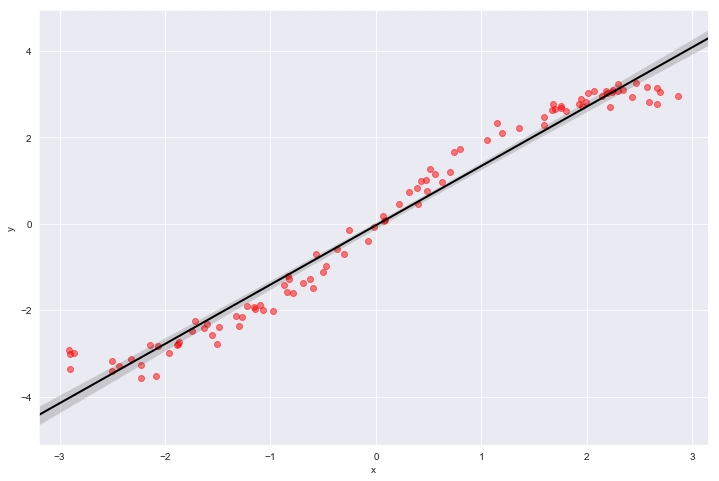

In [13]:
ax, figsize = plt.subplots(figsize=(12, 8))
sns.regplot(x=x, y=y, scatter_kws={'color': 'red', 'alpha': 0.5}, line_kws={'color': 'black', 'linewidth': 2})
plt.xlabel('x')
plt.ylabel('y')

## Residual Plot

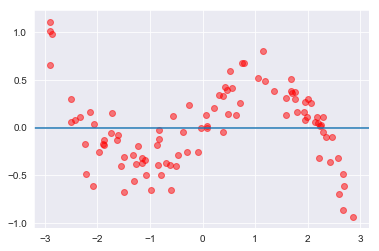

In [14]:
plt.scatter(x, e, alpha=0.5, color='red')
plt.axhline(y=0)

## Heteroskedasticity

In [15]:
x = np.random.uniform(0, 6, 100)
y = x + np.random.normal(loc=0, scale=0.001 * x, size=100)
df = {
    'y': y,
    'x': x
}
df = pd.DataFrame(df)

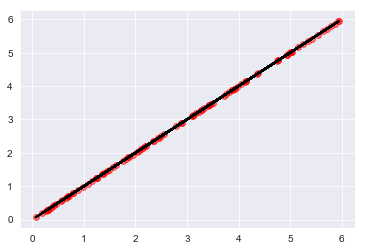

In [16]:
model = smf.ols('y ~ x', data=df).fit()
e = model.resid
yhat = model.predict()

plt.scatter(x, y, alpha=0.5, color='red')
plt.plot(x, yhat, linewidth=2, color='black')

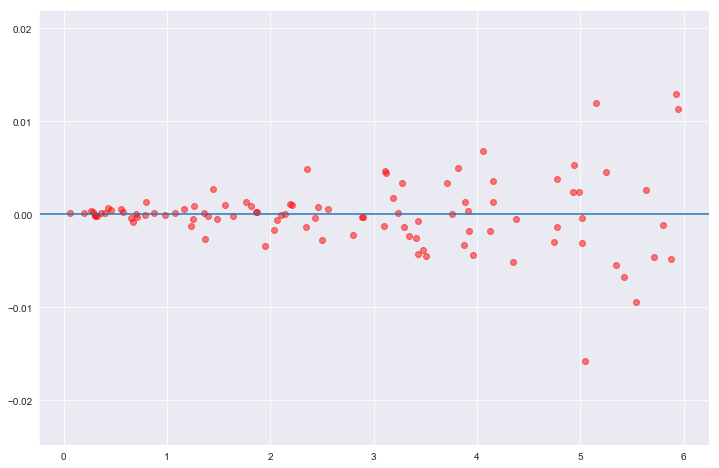

In [17]:
ax, figsize = plt.subplots(figsize=(12, 8))
plt.scatter(x, e, alpha=0.5, color='red')
plt.axhline(y=0)

## Residuals graph for diamond data

In [18]:
model = smf.ols('price ~ carat', data = diamond).fit()
e = model.resid

Text(0, 0.5, 'Residual Price(SIN $)')

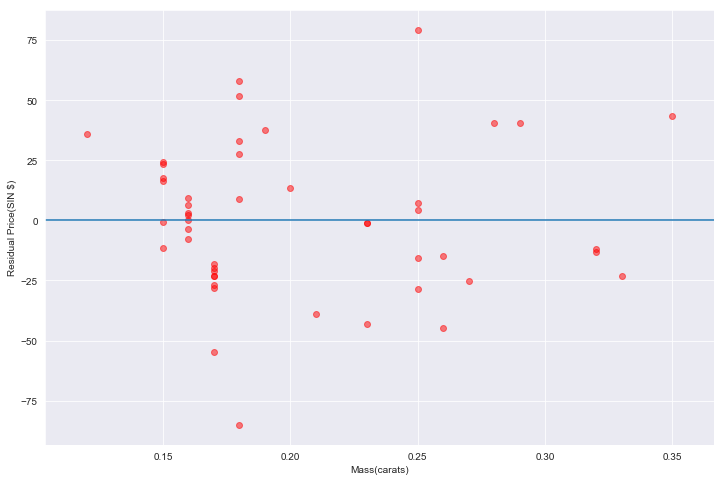

In [19]:
ax, figsize = plt.subplots(figsize=(12, 8))
plt.scatter(diamond['carat'], e, alpha=0.5, color='red')
plt.axhline(y=0)
plt.xlabel('Mass(carats)')
plt.ylabel('Residual Price(SIN $)')

## Residuals Comparison

In [20]:
model1 = smf.ols('price ~ 1', data = diamond).fit()
e1 = model1.resid

In [21]:
residual = np.concatenate((e1,e))
Index = np.concatenate((['Itc'] * diamond.shape[0], ['Itc Slope'] * diamond.shape[0]))

In [22]:
df = pd.DataFrame()
df['Residuals'] = residual
df['Index'] = Index

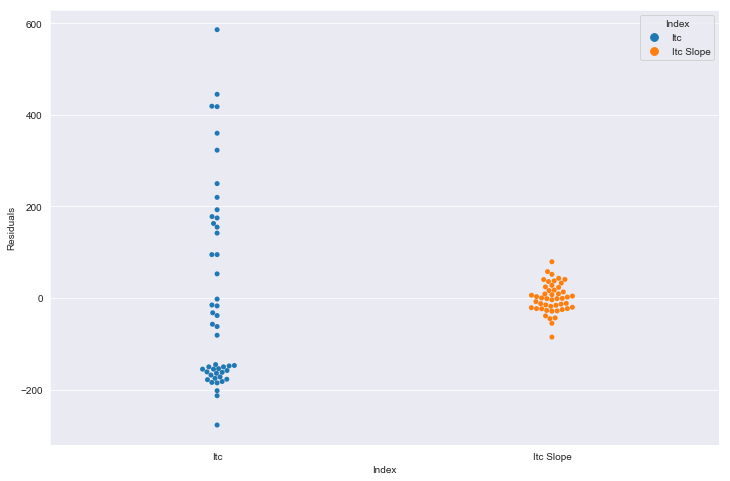

In [23]:
ax, figsize = plt.subplots(figsize=(12, 8))
sns.swarmplot(x='Index', y='Residuals', data=df, hue='Index')

# Residual Variance

In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           6.75e-40
Time:                        17:07:15   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.6259     17.319    -14.991      0.0

In [25]:
np.sqrt(np.sum(e ** 2)/(n-2))

31.84052226503175